In [184]:
from ds_utils.ds_preamble import *
from ds_utils.ds_plotting import *
from ds_utils.ds_helper import *
import datetime

- for isoweekday: mon = 1, Sun = 7
- for weekday: mon = 0, Sun = 6

- timedelta: difference between two dates or times
- date + timedelta => date
- datetime + timedelta => datetime
- date - date => timedelta
- date + date => error
- 

In [185]:
# -------------------------------- date object ------------------------------- #
d = datetime.date(2022,2,3)
print(f"{d.isoformat() = }")
print(f"{d.year = }")
print(f"{d.month = }")
print(f"{d.day = }")

print(d.weekday())
print(d.isoweekday())
print(d.isocalendar())

print(d.strftime("%A")) # get day name 

datetime.date.today()
datetime.date.fromisoformat("2022-11-11")

d.isoformat() = '2022-02-03'
d.year = 2022
d.month = 2
d.day = 3
3
4
datetime.IsoCalendarDate(year=2022, week=5, weekday=4)
Thursday


datetime.date(2022, 5, 2)

datetime.date(2022, 11, 11)

In [186]:
# -------------------------------- datetime object ------------------------------- #
dt = datetime.datetime(2012,2,3,4,5,6,7)
print(f"{dt.isoformat() = }")
print(f"{dt.year = }")
print(f"{dt.month = }")
print(f"{dt.day = }")
print(f"{dt.hour = }")
print(f"{dt.minute = }")
print(f"{dt.second = }")
print(f"{dt.microsecond = }")

print(dt.weekday())
print(dt.isoweekday())
print(dt.isocalendar())

print(dt.strftime("%A"))

datetime.datetime.today()
datetime.datetime.fromisoformat("2022-11-11")

dt.isoformat() = '2012-02-03T04:05:06.000007'
dt.year = 2012
dt.month = 2
dt.day = 3
dt.hour = 4
dt.minute = 5
dt.second = 6
dt.microsecond = 7
4
5
datetime.IsoCalendarDate(year=2012, week=5, weekday=5)
Friday


datetime.datetime(2022, 5, 2, 9, 49, 49, 953428)

datetime.datetime(2022, 11, 11, 0, 0)

In [187]:
# --------------------------------- timedelta -------------------------------- #
delta = datetime.timedelta(
    days=50,
    seconds=27,
    microseconds=10,
    milliseconds=29000,
    minutes=5,
    hours=8,
    weeks=2
)

# the milliseconds etc will be converted to microseconds, etc
delta # datetime.timedelta(days=64, seconds=29156, microseconds=10)
delta.days
delta.seconds
delta.microseconds
delta.total_seconds()

datetime.timedelta(days=64, seconds=29156, microseconds=10)

64

29156

10

5558756.00001

In [188]:
# ----------------------------- timedelta object ----------------------------- #
delta # datetime.timedelta(days=64, seconds=29156, microseconds=10)
d # datetime.date(2022, 2, 3)
dt # datetime.datetime(2012, 2, 3, 4, 5, 6, 7)
type(delta + d) # datetime.date
type(delta + dt) # datetime.datetime
type(delta+delta) # datetime.timedelta
type(d-d) # datetime.timedelta
type(dt-dt) # datetime.timedelta

bday = datetime.date(2023, 3, 15)
bday - datetime.date.today() # datetime.timedelta(days=317)

datetime.timedelta(days=64, seconds=29156, microseconds=10)

datetime.date(2022, 2, 3)

datetime.datetime(2012, 2, 3, 4, 5, 6, 7)

datetime.date

datetime.datetime

datetime.timedelta

datetime.timedelta

datetime.timedelta

datetime.timedelta(days=317)

In [189]:
# --------------------------- strftime and strptime -------------------------- #
# strftime => f means format. Datetime to String
# strptime => p means parse. String to Datetime
t = datetime.datetime.now()
ftime = t.strftime('%B %d, %Y') # format a time
ftime
datetime.datetime.strptime(ftime, '%B %d, %Y') # parse a time

'May 02, 2022'

datetime.datetime(2022, 5, 2, 0, 0)

# analyze crypto data

# why change to datetime64 format in pandas?
- exposes many useful attributes (e.g., `dt.weekday_name`, `dayofyear`, `dt.hour`)
- allows comparison with timestamp from `pd.datetime('2021-01-11)`, for example
- can do comparison with string: `df.date > '2012'`
- aggregation on datetime (e.g., `mean`, `max`)

In [253]:
(df.index.max() - df.index.min())
(df.index.max() - df.index.min()).seconds


# 60*60*986
60*60*9


Timedelta('986 days 09:00:00')

32400

32400

In [192]:
def date_parse(d):
    return datetime.datetime.strptime(d, '%Y-%m-%d %I-%p') 

path = '/Users/whlin/Library/CloudStorage/OneDrive-HKUSTConnect/Documents/python/code_from_others/Corey_code/Python/Pandas/10-Datetime-Timeseries/ETH_1h.csv'
df = pd.read_csv(path)
# df = pd.read_csv(path, parse_dates=['Date'], date_parser=date_parse)
df
df.info()

df['Date'] = pd.to_datetime(df.Date, format='%Y-%m-%d %I-%p')
df

,Date,Symbol,Open,High,Low,Close,Volume
0,2020-03-13 08-PM,ETHUSD,129.94,131.82,126.87,128.71,1940673.93
1,2020-03-13 07-PM,ETHUSD,119.51,132.02,117.10,129.94,7579741.09
2,2020-03-13 06-PM,ETHUSD,124.47,124.85,115.50,119.51,4898735.81
3,2020-03-13 05-PM,ETHUSD,124.08,127.42,121.63,124.47,2753450.92
4,2020-03-13 04-PM,ETHUSD,124.85,129.51,120.17,124.08,4461424.71
...,...,...,...,...,...,...,...
23669,2017-07-01 03-PM,ETHUSD,265.74,272.74,265.00,272.57,1500282.55
23670,2017-07-01 02-PM,ETHUSD,268.79,269.90,265.00,265.74,1702536.85
23671,2017-07-01 01-PM,ETHUSD,274.83,274.93,265.00,268.79,3010787.99
23672,2017-07-01 12-PM,ETHUSD,275.01,275.01,271.00,274.83,824362.87


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23674 entries, 0 to 23673
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    23674 non-null  object 
 1   Symbol  23674 non-null  object 
 2   Open    23674 non-null  float64
 3   High    23674 non-null  float64
 4   Low     23674 non-null  float64
 5   Close   23674 non-null  float64
 6   Volume  23674 non-null  float64
dtypes: float64(5), object(2)
memory usage: 1.3+ MB


,Date,Symbol,Open,High,Low,Close,Volume
0,2020-03-13 20:00:00,ETHUSD,129.94,131.82,126.87,128.71,1940673.93
1,2020-03-13 19:00:00,ETHUSD,119.51,132.02,117.10,129.94,7579741.09
2,2020-03-13 18:00:00,ETHUSD,124.47,124.85,115.50,119.51,4898735.81
3,2020-03-13 17:00:00,ETHUSD,124.08,127.42,121.63,124.47,2753450.92
4,2020-03-13 16:00:00,ETHUSD,124.85,129.51,120.17,124.08,4461424.71
...,...,...,...,...,...,...,...
23669,2017-07-01 15:00:00,ETHUSD,265.74,272.74,265.00,272.57,1500282.55
23670,2017-07-01 14:00:00,ETHUSD,268.79,269.90,265.00,265.74,1702536.85
23671,2017-07-01 13:00:00,ETHUSD,274.83,274.93,265.00,268.79,3010787.99
23672,2017-07-01 12:00:00,ETHUSD,275.01,275.01,271.00,274.83,824362.87


In [193]:
df.Date.describe(datetime_is_numeric=True)
df.Date.min()
df.Date.max()
df.Date.max() - df.Date.min()
df.Date[1] - df.Date[0]

count                  23674
mean     2018-11-06 15:30:00
min      2017-07-01 11:00:00
25%      2018-03-05 01:15:00
50%      2018-11-06 15:30:00
75%      2019-07-11 05:45:00
max      2020-03-13 20:00:00
Name: Date, dtype: object

Timestamp('2017-07-01 11:00:00')

Timestamp('2020-03-13 20:00:00')

Timedelta('986 days 09:00:00')

Timedelta('-1 days +23:00:00')

In [194]:
df.Date.dt.day_name() # get the date of the timestamp
df['DayOfWeek'] = df.Date.dt.day_name()

0          Friday
1          Friday
2          Friday
3          Friday
4          Friday
           ...   
23669    Saturday
23670    Saturday
23671    Saturday
23672    Saturday
23673    Saturday
Name: Date, Length: 23674, dtype: object

In [237]:
# df.Date > '2020'



AttributeError: 'DataFrame' object has no attribute 'Date'

In [195]:
# df[  '2019' <= df.Date < '2020'] # not work 
# df.Date[0] >= '2019' # not work. TypeError: '>=' not supported between instances of 'Timestamp' and 'str'

df.query("2019 <= Date < 2020")
# df[(df.Date>='2019') & (df.Date<'2020')] # same as above

df[(df.Date>=pd.to_datetime('2019-12-29')) & (df.Date<pd.to_datetime('2020-01-01'))]

,Date,Symbol,Open,High,Low,Close,Volume,DayOfWeek
1749,2019-12-31 23:00:00,ETHUSD,128.33,128.69,128.14,128.54,440678.91,Tuesday
1750,2019-12-31 22:00:00,ETHUSD,128.38,128.69,127.95,128.33,554646.02,Tuesday
1751,2019-12-31 21:00:00,ETHUSD,127.86,128.43,127.72,128.38,350155.69,Tuesday
1752,2019-12-31 20:00:00,ETHUSD,127.84,128.34,127.71,127.86,428183.38,Tuesday
1753,2019-12-31 19:00:00,ETHUSD,128.69,128.69,127.60,127.84,1169847.84,Tuesday
...,...,...,...,...,...,...,...,...
10504,2019-01-01 04:00:00,ETHUSD,130.75,133.96,130.74,131.96,2791135.37,Tuesday
10505,2019-01-01 03:00:00,ETHUSD,130.06,130.79,130.06,130.75,503732.63,Tuesday
10506,2019-01-01 02:00:00,ETHUSD,130.79,130.88,129.55,130.06,838183.43,Tuesday
10507,2019-01-01 01:00:00,ETHUSD,131.62,131.62,130.77,130.79,434917.99,Tuesday


,Date,Symbol,Open,High,Low,Close,Volume,DayOfWeek
1749,2019-12-31 23:00:00,ETHUSD,128.33,128.69,128.14,128.54,440678.91,Tuesday
1750,2019-12-31 22:00:00,ETHUSD,128.38,128.69,127.95,128.33,554646.02,Tuesday
1751,2019-12-31 21:00:00,ETHUSD,127.86,128.43,127.72,128.38,350155.69,Tuesday
1752,2019-12-31 20:00:00,ETHUSD,127.84,128.34,127.71,127.86,428183.38,Tuesday
1753,2019-12-31 19:00:00,ETHUSD,128.69,128.69,127.60,127.84,1169847.84,Tuesday
...,...,...,...,...,...,...,...,...
1816,2019-12-29 04:00:00,ETHUSD,127.91,127.93,127.61,127.87,202681.95,Sunday
1817,2019-12-29 03:00:00,ETHUSD,127.96,127.96,127.78,127.91,106307.28,Sunday
1818,2019-12-29 02:00:00,ETHUSD,127.48,127.96,127.47,127.96,90955.03,Sunday
1819,2019-12-29 01:00:00,ETHUSD,127.69,127.77,127.22,127.48,281641.20,Sunday


In [201]:
# if we use `Date` as index, we can do 
# - slicing
df.set_index('Date', inplace=True)

In [208]:
# df['2019'] # warning. avoid!
df['2019-01-05':'2022-09-03']
df['2019-01-05':'2022-09-03'].Close.mean()

,Symbol,Open,High,Low,Close,Volume,DayOfWeek
Date,,,,,,,
2020-03-13 20:00:00,ETHUSD,129.94,131.82,126.87,128.71,1940673.93,Friday
2020-03-13 19:00:00,ETHUSD,119.51,132.02,117.10,129.94,7579741.09,Friday
2020-03-13 18:00:00,ETHUSD,124.47,124.85,115.50,119.51,4898735.81,Friday
2020-03-13 17:00:00,ETHUSD,124.08,127.42,121.63,124.47,2753450.92,Friday
2020-03-13 16:00:00,ETHUSD,124.85,129.51,120.17,124.08,4461424.71,Friday
...,...,...,...,...,...,...,...
2019-01-05 04:00:00,ETHUSD,158.94,159.77,158.40,158.41,1139439.22,Saturday
2019-01-05 03:00:00,ETHUSD,158.78,159.50,157.77,158.94,923896.77,Saturday
2019-01-05 02:00:00,ETHUSD,159.42,160.20,157.73,158.78,1979540.21,Saturday


183.9036800153654

In [211]:
df.loc['2020-01-01'].max() 

Symbol           ETHUSD
Open             132.55
High             132.68
Low              131.94
Close            132.55
Volume       1168999.08
DayOfWeek     Wednesday
dtype: object

# resampling
- why resampling? 
    - for plotting
    - 

True

<AxesSubplot:xlabel='Date'>

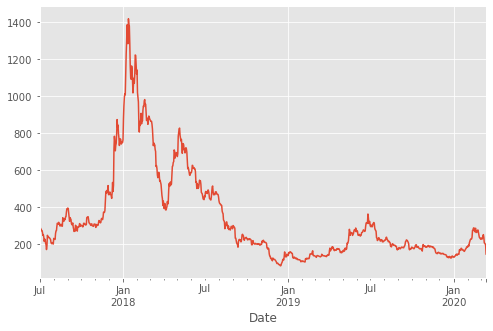

In [225]:
highs = df['High'].resample('1D').max()
highs['2020-01-01'] == df.loc['2020-01-01'].High.max()
highs.plot()

In [273]:
df.reset_index(inplace=True)
df['year'] = df.Date.dt.year
# df
# df.reset_index().Date.dt.year



ValueError: cannot insert level_0, already exists

<AxesSubplot:>

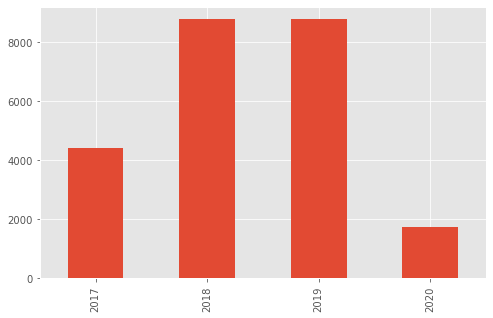

In [279]:
df.year.value_counts().sort_index().plot.bar()

,Symbol,Open,High,Low,Close,Volume,DayOfWeek,year
Date,,,,,,,,
2020-03-13 20:00:00,ETHUSD,129.94,131.82,126.87,128.71,1940673.93,Friday,NaN
2020-03-13 19:00:00,ETHUSD,119.51,132.02,117.10,129.94,7579741.09,Friday,NaN
2020-03-13 18:00:00,ETHUSD,124.47,124.85,115.50,119.51,4898735.81,Friday,NaN
2020-03-13 17:00:00,ETHUSD,124.08,127.42,121.63,124.47,2753450.92,Friday,NaN
2020-03-13 16:00:00,ETHUSD,124.85,129.51,120.17,124.08,4461424.71,Friday,NaN
...,...,...,...,...,...,...,...,...
2017-07-01 15:00:00,ETHUSD,265.74,272.74,265.00,272.57,1500282.55,Saturday,NaN
2017-07-01 14:00:00,ETHUSD,268.79,269.90,265.00,265.74,1702536.85,Saturday,NaN
2017-07-01 13:00:00,ETHUSD,274.83,274.93,265.00,268.79,3010787.99,Saturday,NaN


In [232]:
# df.resample('W').mean() # not useful. Want to have different aggregation for each column
df.resample('W').agg({'Close':[('my_mean', 'mean')], 'High':'max', 'Low':'min', 'Volume':'sum'}) # not useful. Want to have different aggregation for each column

,Close,High,Low,Volume
,my_mean,max,min,sum
Date,,,,
2017-07-02,268.202162,293.73,253.23,8.084631e+07
2017-07-09,261.062083,285.00,231.25,2.246746e+08
2017-07-16,195.698393,240.33,130.26,5.017750e+08
2017-07-23,212.783750,249.40,153.25,7.221637e+08
2017-07-30,203.309524,229.99,178.03,2.657305e+08
...,...,...,...,...
2020-02-16,255.198452,290.00,216.31,3.912867e+08
2020-02-23,265.321905,287.13,242.36,3.067838e+08


In [112]:
# df['2019']
# df.loc['2019']


# inclusive!
df['2020-01':'2020-02']
df.loc['2020-01':'2020-02']

,Symbol,Open,High,Low,Close,Volume,DayOfWeek
Date,,,,,,,
2020-02-29 23:00:00,ETHUSD,223.35,223.58,216.83,217.31,1927939.88,Saturday
2020-02-29 22:00:00,ETHUSD,223.48,223.59,222.14,223.35,535998.57,Saturday
2020-02-29 21:00:00,ETHUSD,224.63,225.14,222.74,223.48,561158.03,Saturday
2020-02-29 20:00:00,ETHUSD,225.31,225.33,223.50,224.63,511648.65,Saturday
2020-02-29 19:00:00,ETHUSD,225.09,225.85,223.87,225.31,1250856.20,Saturday
...,...,...,...,...,...,...,...
2020-01-01 04:00:00,ETHUSD,129.57,130.00,129.50,129.56,702786.82,Wednesday
2020-01-01 03:00:00,ETHUSD,130.37,130.44,129.38,129.57,496704.23,Wednesday
2020-01-01 02:00:00,ETHUSD,130.14,130.50,129.91,130.37,396315.72,Wednesday


,Symbol,Open,High,Low,Close,Volume,DayOfWeek
Date,,,,,,,
2020-02-29 23:00:00,ETHUSD,223.35,223.58,216.83,217.31,1927939.88,Saturday
2020-02-29 22:00:00,ETHUSD,223.48,223.59,222.14,223.35,535998.57,Saturday
2020-02-29 21:00:00,ETHUSD,224.63,225.14,222.74,223.48,561158.03,Saturday
2020-02-29 20:00:00,ETHUSD,225.31,225.33,223.50,224.63,511648.65,Saturday
2020-02-29 19:00:00,ETHUSD,225.09,225.85,223.87,225.31,1250856.20,Saturday
...,...,...,...,...,...,...,...
2020-01-01 04:00:00,ETHUSD,129.57,130.00,129.50,129.56,702786.82,Wednesday
2020-01-01 03:00:00,ETHUSD,130.37,130.44,129.38,129.57,496704.23,Wednesday
2020-01-01 02:00:00,ETHUSD,130.14,130.50,129.91,130.37,396315.72,Wednesday


In [113]:
df['2020-01':'2020-02'].Close.mean()

195.1655902777778

In [123]:
df.loc['2020-01-01'].High.max()

132.68

In [124]:
# if we want to change the time period to something else, we need to do `resampling`
highs = df.High.resample('D').max()

In [127]:
highs['2020-01-01'] 

132.68

<AxesSubplot:xlabel='Date'>

<Figure size 576x360 with 0 Axes>

<AxesSubplot:xlabel='Date'>

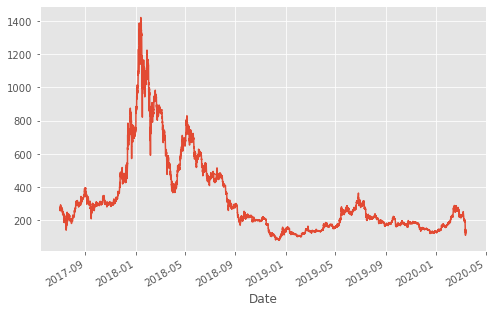

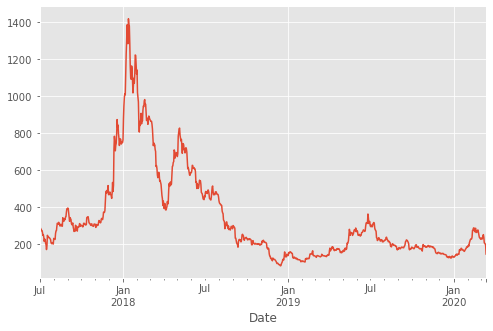

In [132]:
df.High.plot()
plt.figure()
highs.plot()

In [96]:
datetime.datetime('2019-01-01')

TypeError: an integer is required (got type str)

In [66]:
df.dtypes
# df.loc[0, 'Date']
# df.loc[0, 'Date'].day_name()

Date      datetime64[ns]
Symbol            object
Open             float64
High             float64
Low              float64
Close            float64
Volume           float64
dtype: object

In [280]:
df = pd.read_csv('http://bit.ly/uforeports')

In [290]:
# df.nunique()
df['Time'] = pd.to_datetime(df.Time)

In [298]:
# df.Time.dt.weekday
df['day'] = df.Time.dt.day_name()
df['year'] = df.Time.dt.year

In [319]:
# sns.countplot(x=df.day)

df.year.value_counts()

sns.lineplot(x=[])


# plt.figure()
# sns.lineplot(x=df.year)
# df.year.value_counts().sort_index().plot()

# sns.lineplot(x=df.year.value_counts())

1999    2774
2000    2635
1998    1743
1995    1344
1997    1237
        ... 
1936       2
1930       2
1935       1
1934       1
1933       1
Name: year, Length: 68, dtype: int64